In [1]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import spacy

nlp = spacy.load("pl_core_news_md")

In [2]:
df = pd.read_csv("klej_polemo2.0-in/dev.tsv", sep="\t")
corpus = df["sentence"].tolist()
doc_corpus = list(nlp.pipe(corpus, disable=["ner"]))
norm_corpus = [[token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop] 
               for doc in doc_corpus]

In [3]:
vect = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x, 
                       max_df=0.95, min_df=0.02)
dtm = vect.fit_transform(norm_corpus)
feature_names = vect.get_feature_names()

In [4]:
def get_top_features(cluster_centers, feature_names, top_n):
    ordered_features = cluster_centers.argsort()[:, ::-1][:, :top_n]
    top_feat_names = [[feature_names[idx] for idx in feat_vect] for feat_vect in ordered_features]
    return np.array(top_feat_names)

# Grupowanie

## Affinity propagation

### Dane
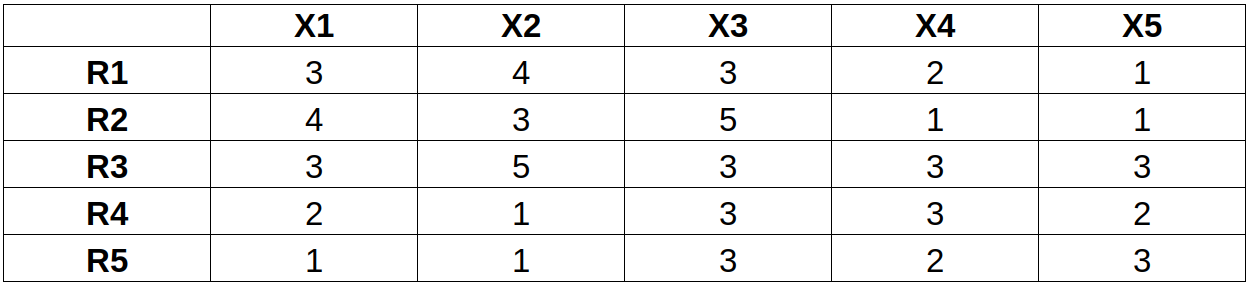

### Dane
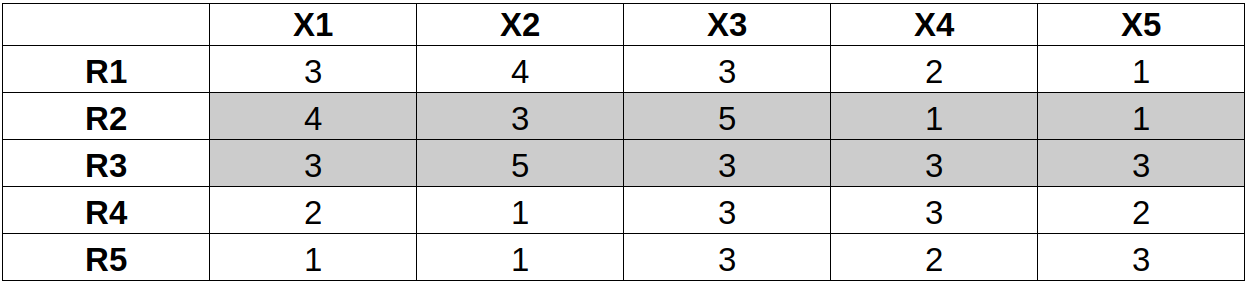

### Similarity Matrix
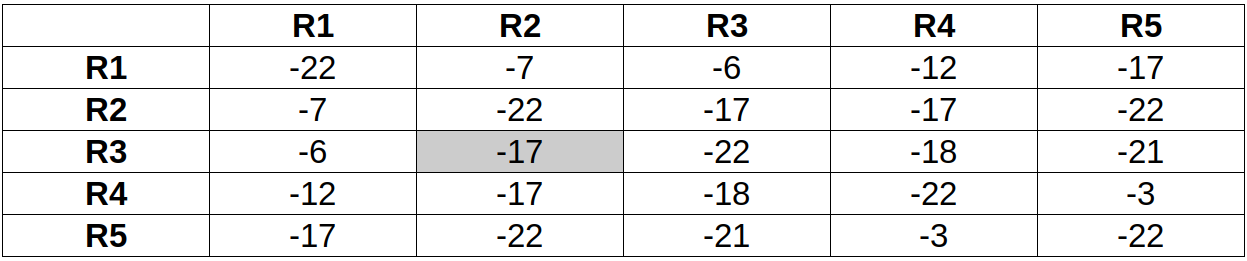

### Similarity Matrix
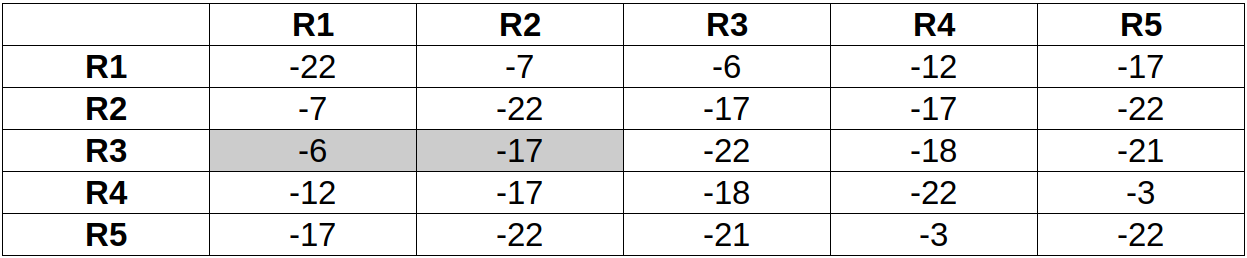

### Responsibility Matrix
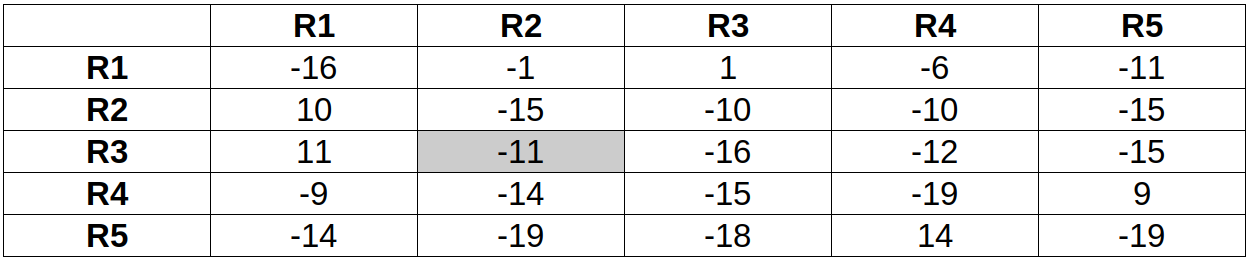

### Responsibility Matrix
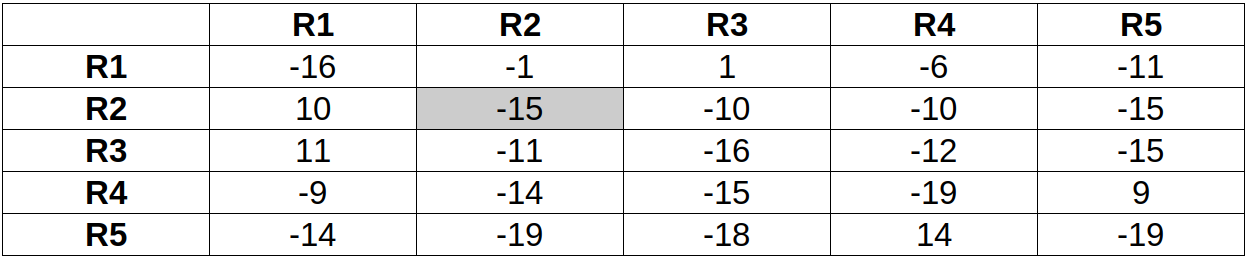

### Availability Matrix
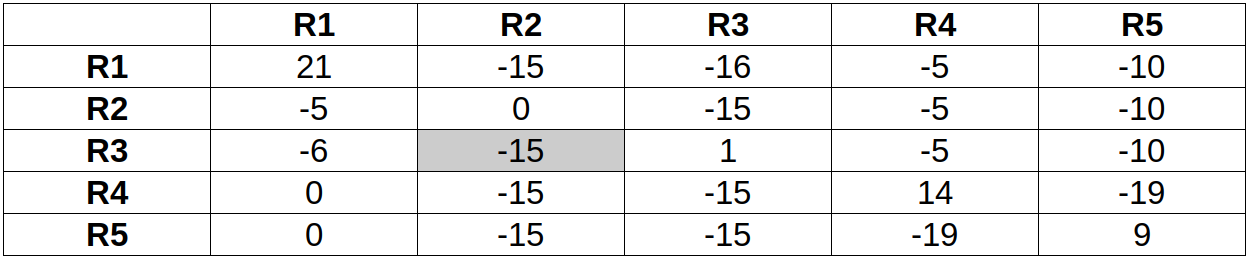

### Responsibility Matrix
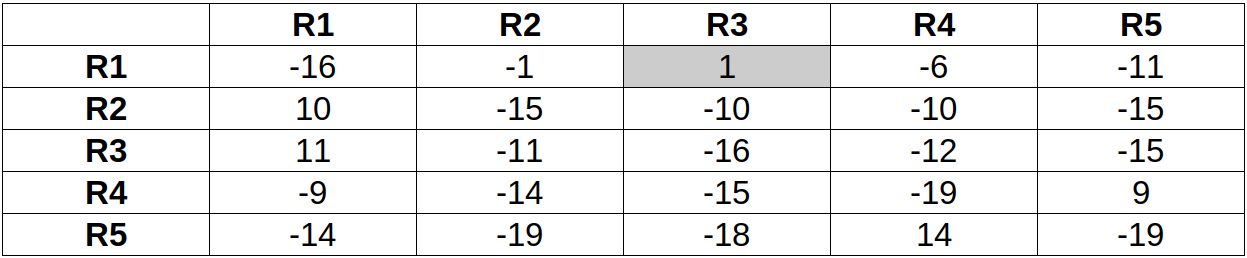

### Availability Matrix
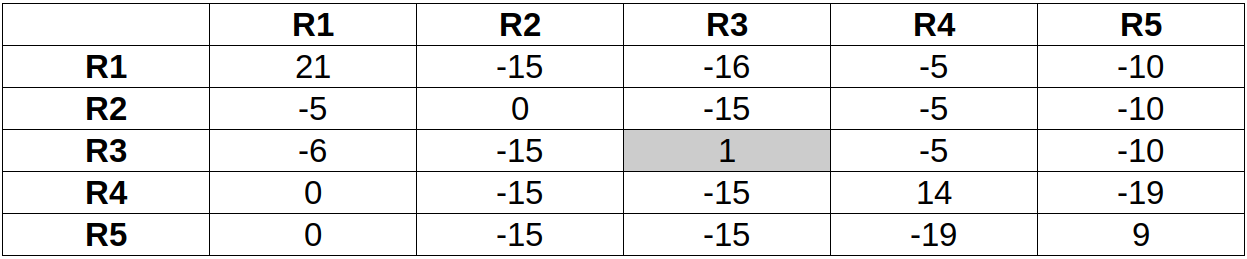

### Responsibility Matrix
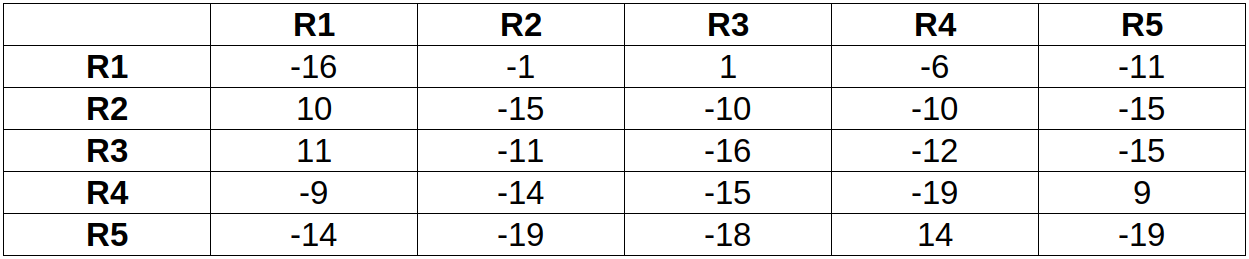

### Availability Matrix
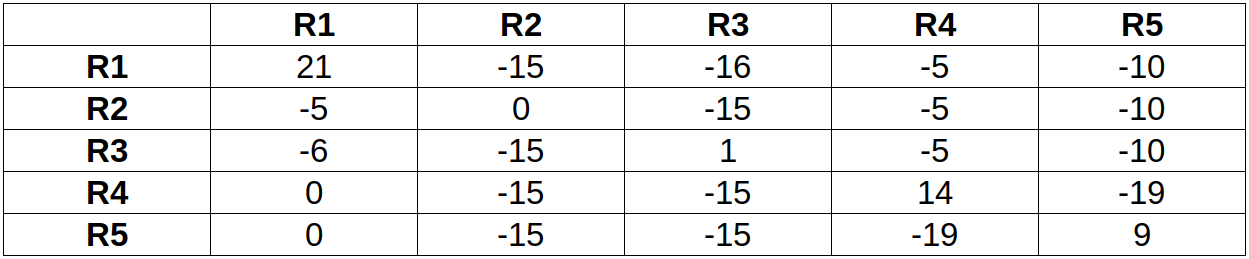

### Criterion Matrix
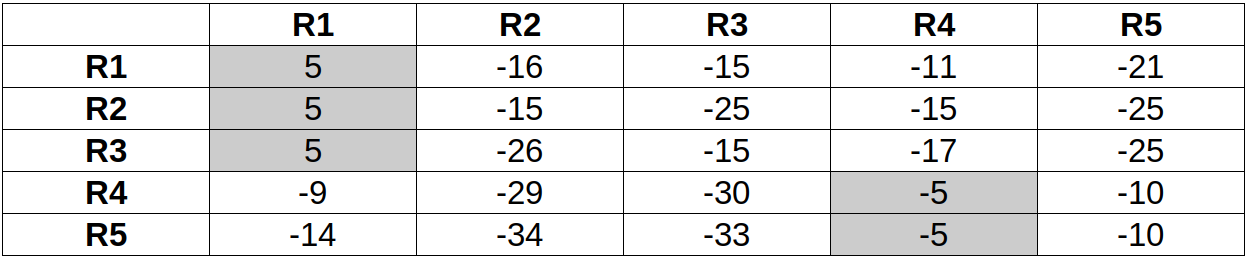

In [5]:
from sklearn.cluster import AffinityPropagation

In [6]:
ap = AffinityPropagation(max_iter=1000, random_state=42)

In [7]:
ap.fit(dtm)

AffinityPropagation(max_iter=1000, random_state=42)

In [8]:
ap.labels_

array([16, 16, 12,  2, 30,  0, 34,  1, 35, 22,  3,  5,  2,  3, 13, 16, 29,
        3,  6, 28,  4, 39,  5,  4, 20, 27, 12, 19, 22, 16,  1, 26, 20, 24,
       54, 33,  5, 39, 33, 40, 20, 18, 19, 14, 13, 11, 24, 48, 22, 20, 24,
        6, 18, 33, 35, 34, 27, 26, 17,  4, 36,  5, 54, 27, 31, 12, 22, 24,
       23,  8, 34, 33, 48,  6, 32,  7, 22, 32,  4,  1, 37, 34,  6,  0, 13,
       27,  8, 26, 33,  4, 39,  9,  2, 13, 33, 25,  7, 26, 33,  9, 61, 33,
       10,  6, 15, 18, 30,  2,  6, 36,  1, 24, 27,  5, 27, 20, 21, 12, 27,
       48, 11, 18,  0,  8, 12, 30,  9, 33, 22, 16, 26, 12, 25, 33, 13, 36,
       25, 33, 14, 10,  9, 15,  5,  8,  5, 37, 15, 16, 10, 16, 33, 37, 20,
        1, 27,  2, 10, 12, 37, 16, 12, 12, 17, 18, 28, 31, 36, 33, 16, 18,
       13, 23,  9, 24,  4, 36, 19, 27, 20, 21, 38, 20,  6, 21, 18, 17, 36,
        7, 22, 19,  0, 13,  9, 22,  5,  9, 31, 12, 33, 27, 23, 24, 27, 31,
       24, 36, 25, 26, 24,  7, 22, 11, 12, 22,  2, 10, 17, 27, 12, 22, 16,
       29, 30, 39, 21, 21

In [9]:
Counter(ap.labels_)

Counter({16: 14,
         12: 19,
         2: 7,
         30: 7,
         0: 5,
         34: 6,
         1: 6,
         35: 3,
         22: 16,
         3: 4,
         5: 10,
         13: 17,
         29: 6,
         6: 11,
         28: 3,
         4: 7,
         39: 8,
         20: 12,
         27: 21,
         19: 6,
         26: 7,
         24: 11,
         54: 9,
         33: 16,
         40: 6,
         18: 9,
         14: 5,
         11: 10,
         48: 9,
         17: 4,
         36: 10,
         31: 9,
         23: 5,
         8: 5,
         32: 5,
         7: 5,
         37: 7,
         9: 8,
         25: 7,
         61: 8,
         10: 6,
         15: 3,
         21: 8,
         38: 8,
         47: 7,
         74: 7,
         49: 8,
         52: 21,
         76: 5,
         72: 12,
         71: 7,
         70: 13,
         67: 7,
         41: 11,
         50: 20,
         57: 14,
         43: 17,
         42: 5,
         77: 9,
         45: 9,
         73: 8,
         59: 17

In [10]:
len(Counter(ap.labels_))

82

In [11]:
docs = [doc for label, doc in zip(ap.labels_, corpus) if label == 0]

In [12]:
for doc in docs:
    print(doc, "\n")

Pani dr Szeliga zna sie na rzeczy , spokojnie i dokladnie wyjasnila problem , była miła , życzliwa i rzetelna . Przyznam ze po pierwszej ( troszke oschlej ) wizycie obawiała m się kolejnej konsultacji , jednak otrzymała m pomoc jakiej oczekiwała m i z pewnością będę kontynuowała leczenie u Pani doktor . 

Do Pani Doktor trafiła m z 15 - miesięcznym synem , u którego w wymazie wyszły przyprawiające o panikę bakterie . Po dwóch kolejnych wymazach pobieranych osobiście przez dr i trafnym leczeniu po bakteriach nie było śladu . Przy okazji dowiedziała m się o innej rzeczy w oku dziecka , na którą powinna m zwracać uwagę . Podczas kolejnych wizyt dziecko było kompleksowo przebadane , bez pośpiechu i w miłej atmosferze . Zadaję wiele pytań i na wszystkie otrzymała m odpowiedź , bez śladu irytacji . Polecam dr Orawiec . 

Jakiś czas temu była m na konsultacji , na podstawie której podjęła m decyzję o tym , że NIE poddam się operacji u dr Jarlińskiego . Umówiona na konkretną godzinę , podeszła

In [13]:
ap.cluster_centers_

<82x494 sparse matrix of type '<class 'numpy.float64'>'
	with 2188 stored elements in Compressed Sparse Row format>

In [14]:
top_features = get_top_features(ap.cluster_centers_.toarray(), feature_names, 20)

In [15]:
top_features[0]

array(['m', 'konsultacja', 'pewność', 'oczekiwać', 'znać', 'pomoc',
       'rzecz', 'otrzymać', 'leczenie', 'kolejny', 'dr', 'problem',
       'miły', 'doktor', 'pierwszy', 'wizyta', 'należeć', 'napisać',
       'moich', 'mojego'], dtype='<U13')

In [16]:
top_features[1]

array(['skóra', 'lek', 'mały', 'dziecko', 'm', 'dzień', 'problem',
       'kazać', 'liczyć', 'ilość', 'stwierdzić', 'wydawać', 'dostać',
       'dopiero', 'niestety', 'rok', 'śmy', 'doktor', 'osoba', 'wizyta'],
      dtype='<U13')

In [17]:
top_features[-1]

array(['standard', 'pokój', 'otoczenie', 'jesteśmy', 'wolny', 'takim',
       'stolik', 'czysto', 'rezerwacja', 'otrzymać', 'zdecydowanie',
       'informacja', 'koniec', 'mały', 'śniadanie', 'brak', 'śmy',
       'moment', 'moją', 'mojej'], dtype='<U13')

In [18]:
top_features[-2]

array(['miejsce', 'brakować', 'typ', 'klient', 'okolica', 'ładny',
       'smaczny', 'cena', 'jedzenie', 'polecać', 'życie', 'możliwość',
       'morze', 'moment', 'mojego', 'moją', 'mojej', 'moich', 'miły',
       'minuta'], dtype='<U13')

In [19]:
pd.DataFrame(top_features.T)

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,m,skóra,związek,proces,wynik,m,choroba,osoba,chory,śmy,...,pokój,opłata,sala,kawa,ulica,gość,hotel,obiekt,miejsce,standard
1,konsultacja,lek,wyjaśnić,dr,pytanie,dr,serce,życie,zespół,człowiek,...,hotel,śmy,spa,śniadanie,okno,dostępny,czysty,rynek,brakować,pokój
2,pewność,mały,pap,punkt,leczenie,ciąża,np,prof,pap,wysoki,...,jakość,dodatkowy,hotel,herbata,skóra,hotel,basen,ulica,typ,otoczenie
3,oczekiwać,dziecko,badanie,sieć,pacjent,wizyta,zespół,choroba,pacjent,badanie,...,m,miejsce,jacuzzi,kolejka,daleko,przestronny,miły,pora,klient,jesteśmy
4,znać,m,proces,organizm,pierwszy,ginekolog,krew,dziecko,badanie,pozwalać,...,miejsce,pobyt,swojej,wystrój,zjeść,góra,wielkość,r,okolica,wolny
5,pomoc,dzień,naukowiec,wokół,wizyta,szukać,chory,proc,sam,krew,...,zostały,wcześnie,stół,parking,ciepły,większość,lubić,obecnie,ładny,takim
6,rzecz,problem,in,tą,kompetentny,ciążyć,temat,krew,wpływ,podobny,...,tą,minuta,sa,dzienie,samochód,korytarz,wakacje,podobny,smaczny,stolik
7,otrzymać,kazać,nadzieja,pap,moją,powód,ostatni,nieco,bliski,trzy,...,oczekiwać,góra,reszta,hotel,położenie,zjeść,wieczór,firma,cena,czysto
8,leczenie,liczyć,nikt,tłumaczyć,sympatyczny,mieć,dzienie,ogół,ramy,pomoc,...,spędzić,wolny,chory,wybór,każdym,stolik,oferta,in,jedzenie,rezerwacja
9,kolejny,ilość,rano,sprawa,tłumaczyć,uważać,osoba,trudno,zależeć,różny,...,zapach,poinformować,zabawa,zł,posiłek,obiad,plaża,powód,polecać,otrzymać
